<a href="https://colab.research.google.com/github/VitorVini/Analise-InfracoesDeTransito/blob/main/Analise_Infracoes_de_Transito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações e Atribuições do dataset

In [ ]:
!pip install folium geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive', True)

Mounted at /content/drive


In [ ]:
# DataFrames, Cálculos e Estatísticas
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Geolocalização
from geopy.geocoders import Nominatim
import folium

# Pré-Processamento dos dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Clusterização
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Avisos de bibliotecas
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings('ignore')

In [ ]:
# Caminhos relativos dos datasets
filepath1 = '/content/drive/MyDrive/Colab Notebooks/datasets/infracoes2021.csv'
filepath2 = '/content/drive/MyDrive/Colab Notebooks/datasets/infracoes2020.csv'
filepath3 = '/content/drive/MyDrive/Colab Notebooks/datasets/infracoes2019.csv'
filepath4 = '/content/drive/MyDrive/Colab Notebooks/datasets/infracoes2018.csv'
filepath5 = '/content/drive/MyDrive/Colab Notebooks/datasets/infracoes2017.csv'
filepath6 = '/content/drive/MyDrive/Colab Notebooks/datasets/infracoes2016.csv'

# Atribuição dos datasets
df1 = pd.read_csv(filepath1, sep=';', header=0)
df2 = pd.read_csv(filepath2, sep=';', header=0)
df3 = pd.read_csv(filepath3, sep=';', header=0)
df4 = pd.read_csv(filepath4, sep=';', header=0)
df5 = pd.read_csv(filepath5, sep=';', header=0)
df6 = pd.read_csv(filepath6, sep=';', header=0)

In [ ]:
# Junção dos datasets em um só dataFrame
df = pd.concat([df1, df2, df3, df4, df5, df6])

# Tratamento Inicial dos dados

In [ ]:
# Configuração dp pandas para exibir números completos sem notação científica
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))

In [ ]:
df.head()

,datainfracao,horainfracao,dataimplantacao,agenteequipamento,infracao,descricaoinfracao,amparolegal,localcometimento
0,2021-01-01,06:04:31,2021-01-20,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima permitida para o local em até 20% (vinte por cento).,"Art. 218, Inc. I","AV. GOV. AGAMENON MAGALHAES, SEMAFORO 069, Sentido:BOA VIAGEM Faixa: 2"
1,2021-01-01,06:04:59,2021-01-20,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima permitida para o local em até 20% (vinte por cento).,"Art. 218, Inc. I","AV. NORTE MIGUEL ARRAES DE ALENCAR, SEMAFORO 424,S/N Sentido:SUBURBIO Faixa: 1"
2,2021-01-01,06:09:36,2021-01-20,Código 5 - FOTO SENSOR,6050,Avançar o sinal vermelho do semáforo - fiscalização eletrônica.,Art. 208,"AV. GOV. AGAMENON MAGALHAES, SEMAFORO 069, Sentido:BOA VIAGEM Faixa: 2"
3,2021-01-01,06:13:31,2021-01-20,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima permitida para o local em até 20% (vinte por cento).,"Art. 218, Inc. I","RUA REAL DA TORRE, SEMAFORO 237., Sentido:AFOGADOS Faixa: 2"
4,2021-01-01,06:16:51,2021-01-20,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima permitida para o local em até 20% (vinte por cento).,"Art. 218, Inc. I","RUA REAL DA TORRE, SEMAFORO 237., Sentido:AFOGADOS Faixa: 1"


In [ ]:
# Remoção da coluna 'Data_Implantacao'
df.drop('dataimplantacao', axis=1, inplace=True)

# Denominação das colunas
df = df.rename(columns={'datainfracao': 'Data_Infracao', 'horainfracao': 'Hora_Infracao',
                           'agenteequipamento' : 'Agente_Equipamento', 'infracao': 'Codigo_Infracao', 'descricaoinfracao': 'Descricao_Infracao',
                           'amparolegal': 'Amparo_Legal', 'localcometimento': 'Local_Infracao'})

In [ ]:
df

,Data_Infracao,Hora_Infracao,Agente_Equipamento,Codigo_Infracao,Descricao_Infracao,Amparo_Legal,Local_Infracao
0,2021-01-01,06:04:31,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima permitida para o local em até 20% (vinte por cento).,"Art. 218, Inc. I","AV. GOV. AGAMENON MAGALHAES, SEMAFORO 069, Sentido:BOA VIAGEM Faixa: 2"
1,2021-01-01,06:04:59,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima permitida para o local em até 20% (vinte por cento).,"Art. 218, Inc. I","AV. NORTE MIGUEL ARRAES DE ALENCAR, SEMAFORO 424,S/N Sentido:SUBURBIO Faixa: 1"
2,2021-01-01,06:09:36,Código 5 - FOTO SENSOR,6050,Avançar o sinal vermelho do semáforo - fiscalização eletrônica.,Art. 208,"AV. GOV. AGAMENON MAGALHAES, SEMAFORO 069, Sentido:BOA VIAGEM Faixa: 2"
3,2021-01-01,06:13:31,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima permitida para o local em até 20% (vinte por cento).,"Art. 218, Inc. I","RUA REAL DA TORRE, SEMAFORO 237., Sentido:AFOGADOS Faixa: 2"
4,2021-01-01,06:16:51,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima permitida para o local em até 20% (vinte por cento).,"Art. 218, Inc. I","RUA REAL DA TORRE, SEMAFORO 237., Sentido:AFOGADOS Faixa: 1"
...,...,...,...,...,...,...,...
597441,2016-12-31,18:10:24,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima permitida para o local em até 20% (vinte por cento).,"Art. 218, Inc. I","AV. GOV. AGAMENON MAGALHAES, SEMAFORO 173."
597442,2016-12-31,09:51:28,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima permitida para o local em até 20% (vinte por cento).,"Art. 218, Inc. I","AV. MARECHAL MASCARENHAS DE MORAES - SEMAFORO, 531."
597443,2016-12-31,06:24:22,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima permitida para o local em até 20% (vinte por cento).,"Art. 218, Inc. I","AV. MARECHAL MASCARENHAS DE MORAES - SEMAFORO, 531."
597444,2016-12-31,14:15:45,Código 3 - LOMBADA ELETRÔNICA,7455,Transitar em velocidade superior à máxima permitida para o local em até 20% (vinte por cento).,"Art. 218, Inc. I","AV. ENG. DOMINGOS FERREIRA, SEMAFORO 338"


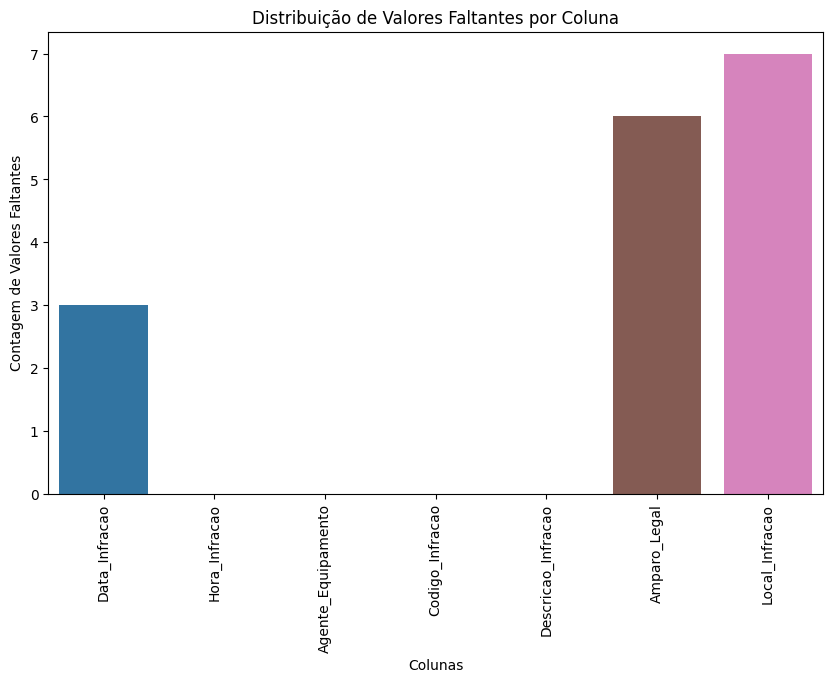

In [ ]:
# ANÁLISE DE DADOS FALTANTES
missing_values = df.isna().sum()

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.xlabel('Colunas')
plt.ylabel('Contagem de Valores Faltantes')
plt.title('Distribuição de Valores Faltantes por Coluna')
plt.show()

# Remoção dos valores nulos
df = df.dropna(axis = 0)

In [ ]:
# Conversões
# Conversão da coluna 'Codigo_Infracao' para object
df['Codigo_Infracao'] = df['Codigo_Infracao'].astype('object')

# Conversão da coluna 'Data_Infracao' para datetime
df['Data_Infracao'] = pd.to_datetime(df['Data_Infracao'])

# Conversão da coluna 'Hora_Infracao' para datetime
df['Hora_Infracao'] = pd.to_datetime(df['Hora_Infracao'])

# Análise Exploratória com Visualização de Dados

In [ ]:
# DISTRIBUIÇÃO DAS INFRAÇÕES
infractions_by_year = df.groupby(df['Data_Infracao'].dt.year)['Codigo_Infracao'].count()

# Criação do gráfico interativo com Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=infractions_by_year.index, y=infractions_by_year.values, mode='lines+markers'))

# Configuração do layout
fig.update_layout(title='Distribuição das Infrações ao Longo do Tempo',
                  xaxis_title='Ano',
                  yaxis_title='Quantidade de Infrações')

fig.show()

In [ ]:
# Mapeamento para agrupar infrações semelhantes
infractions_mapping = {
    'Dirigir o veículo segurando o telefone celular.': 'Dirigir enquanto utiliza o telefone celular',
    'Dirigir o veículo utilizando-se de telefone celular.': 'Dirigir enquanto utiliza o telefone celular',
    'Dirigir o veículo manuseando o telefone celular.': 'Dirigir enquanto utiliza o telefone celular'
}

# Aplica o mapeamento para agrupar as infrações
df['Descricao_Infracao'] = df['Descricao_Infracao'].map(infractions_mapping).fillna(df['Descricao_Infracao'])

# Cálculo da contagem de cada tipo de infração
infractions_count = df['Descricao_Infracao'].value_counts().nlargest(18)

# Definição das cores das barras
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)',
          'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 'rgb(188, 189, 34)', 'rgb(23, 190, 207)',
          'rgb(174, 199, 232)', 'rgb(255, 152, 150)', 'rgb(255, 187, 120)', 'rgb(152, 223, 138)', 'rgb(197, 176, 213)',
          'rgb(196, 156, 148)', 'rgb(247, 182, 210)', 'rgb(199, 199, 199)', 'rgb(219, 219, 141)']

# Ordenação das legendas
sorted_infractions = infractions_count.index.tolist()

# Criação do gráfico de barras com tooltips interativos e legendas ordenadas
fig = go.Figure()

for i, (infraction, count) in enumerate(zip(sorted_infractions, infractions_count)):
    fig.add_trace(go.Bar(x=[infraction], y=[count],
                         hovertemplate='Descrição da Infração: %{x}<br>Quantidade de Infrações: %{y}',
                         marker_color=colors[i],
                         name=infraction,
                         legendgroup=infraction))  # Adicionando a mesma 'legendgroup' para ordenação

fig.update_layout(
    title='Principais Tipos de Infrações',
    xaxis_visible=False,
    xaxis_showticklabels=False,
    yaxis_title='Quantidade de Infrações',
    legend=dict(title='Infrações', tracegroupgap=100, traceorder='normal')  # Definindo a ordem das legendas
)

fig.show()


In [ ]:
# AGRUPAMENTO DAS INFRAÇÔES POR MÊS
infractions_by_month = df.groupby(pd.Grouper(key='Data_Infracao', freq='M')).size().reset_index(name='Quantidade')

# Gráfico de linha interativo com tooltips
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=infractions_by_month['Data_Infracao'],
    y=infractions_by_month['Quantidade'],
    mode='lines+markers',
    hovertemplate='<b>Mês:</b> %{x|%B}<br><b>Quantidade:</b> %{y}',
    marker=dict(
        symbol='circle',
        size=8
    )
))

fig.update_layout(
    xaxis_title='Data',
    yaxis_title='Quantidade de Infrações',
    title='Tendência Temporal das Infrações por Mês'
)

fig.show()

In [ ]:
# ANÁLISE DOS AMPAROS LEGAIS
amparos_count = df['Amparo_Legal'].value_counts().reset_index()
amparos_count.columns = ['Amparo_Legal', 'Contagem']

# Filtro dos 10 amparos legais com maior contagem de infrações
top_10_amparos = amparos_count.head(10)

fig = px.bar(top_10_amparos, x='Contagem', y='Amparo_Legal', orientation='h',
             title='Top 10 Amparos Legais para Infrações de Trânsito')

fig.update_traces(hovertemplate='Amparo Legal: %{y}<br>Contagem: %{x}')

fig.update_layout(xaxis_title='Contagem de Infrações', yaxis_title='Amparo Legal')

fig.show()


In [ ]:
# DISTRIBUIÇÂO DAS FORMAS DE AUTUAÇÂO
# Remoção dos valores numéricos da coluna 'Agente_Equipamento'
df = df[~(df['Agente_Equipamento'].notna() & df['Agente_Equipamento'].astype(str).str.match(r'^\d+(\.\d+)?$'))]

# Pré-processamento para agrupar valores semelhantes
df['Agente_Equipamento'] = df['Agente_Equipamento'].replace({
    'Código 5 - FOTOSENSOR': 'Código 5 - FOTO SENSOR',
    'Código 7 - ZONA AZUL TALÃO ELETRÔNICO': 'Código 8 - AUTOS NO TALÃO ELETRÔNICO'
})

# Calculo da proporção de cada forma de autuação
autuacao_prop = df['Agente_Equipamento'].value_counts(normalize=True)

# Cores das barras e do gráfico de pizza
colors = ['rgb(31, 119, 180)', 'rgb(255, 127, 14)', 'rgb(44, 160, 44)', 'rgb(214, 39, 40)', 'rgb(148, 103, 189)',
          'rgb(140, 86, 75)', 'rgb(227, 119, 194)', 'rgb(127, 127, 127)', 'rgb(188, 189, 34)', 'rgb(23, 190, 207)',
          'rgb(174, 199, 232)', 'rgb(255, 152, 150)', 'rgb(255, 187, 120)', 'rgb(152, 223, 138)', 'rgb(197, 176, 213)',
          'rgb(196, 156, 148)', 'rgb(247, 182, 210)', 'rgb(199, 199, 199)', 'rgb(219, 219, 141)']

# Ordem das legendas
sorted_autuacoes = autuacao_prop.index.tolist()

# Gráfico de barras com tooltips interativos e legendas ordenadas
fig = make_subplots(rows=1, cols=2, subplot_titles=['Gráfico de Pizza', 'Formas de Autuação'], specs=[[{"type": "pie"}, {"type": "bar"}]])

# Gráfico de pizza
fig.add_trace(go.Pie(
    labels=autuacao_prop.index,
    values=autuacao_prop.values,
    hole=0.4,
    marker=dict(colors=colors)
), row=1, col=1)

# Gráfico de barras
for i, (autuacao, prop) in enumerate(zip(sorted_autuacoes, autuacao_prop)):
    fig.add_trace(go.Bar(
        x=[autuacao],
        y=[prop],
        hovertemplate='Forma de Autuação: %{x}<br>Proporção: %{y:.2%}',
        marker=dict(color=colors[i]),  # Usar as mesmas cores definidas para o gráfico de barras
        legendgroup=autuacao,
        legendrank=i,
        showlegend=True if i == 0 else False,
        name=autuacao
    ), row=1, col=2)

fig.update_layout(
    title='Distribuição das Formas de Autuação',
    showlegend=False
)

# Orientação da legenda do gráfico de barras
fig.update_traces(orientation='v', row=1, col=2)

fig.show()


In [ ]:
# Extração da hora da coluna 'Hora_Infracao'
df['Hora'] = df['Hora_Infracao'].dt.hour

# Contagem da frequência de ocorrência de cada hora
hora_infractions_count = df['Hora'].value_counts().sort_index()

# Criação dos valores e rótulos personalizados para o eixo X
tickvals = list(hora_infractions_count.index)
ticktext = [str(h) for h in tickvals]

# Gráfico de barras
fig = px.bar(hora_infractions_count, x=tickvals, y=hora_infractions_count.values)

fig.update_layout(
    title='Distribuição das Infrações ao Longo do Dia',
    xaxis_title='Hora do Dia',
    yaxis_title='Contagem de Infrações',
    xaxis=dict(
        tickmode='array',
        tickvals=tickvals,
        ticktext=ticktext,
        title='Hora do Dia',
        dtick=1
    )
)

fig.update_traces(hovertemplate='Hora: %{x}<br>Infrações: %{y}')

fig.show()

In [ ]:
# CÁLCULO DE INFRAÇÔES POR LOCAL E DE INFRAÇÔES MAIS RECORRENTES POR LOCAL
# Configuração de exibição do pandas
pd.set_option('display.max_colwidth', None)

# Filtro das colunas de interesse (Local_Infracao e Descricao_Infracao)
data = df[['Local_Infracao', 'Descricao_Infracao']]

# Contagem das ocorrências de cada local de infração
infractions_count = data['Local_Infracao'].value_counts().reset_index()

# Definição das colunas
infractions_count.columns = ['Local_Infracao', 'Contagem']

# Ordenação em ordem decrescente pela contagem
top_10_locations = infractions_count.head(10)

# Filtro dos locais mais frequentes
top_locations = data[data['Local_Infracao'].isin(top_10_locations['Local_Infracao'])]

# Contagem das ocorrências de cada par (Local_Infracao, Descricao_Infracao)
infractions_count_by_location = top_locations.groupby(['Local_Infracao', 'Descricao_Infracao']).size().reset_index()
infractions_count_by_location.columns = ['Local_Infracao', 'Descricao_Infracao', 'Contagem']

# Infração mais comum em cada local
most_common_infractions = infractions_count_by_location.groupby('Local_Infracao').apply(lambda x: x.nlargest(1, 'Contagem')).reset_index(drop=True)

print("Lugares com mais infrações:")
print(top_10_locations)
print()
print("Infração mais comum em cada local:")
print(most_common_infractions)

Lugares com mais infrações:
                                                          Local_Infracao  \
0    RUA ARQ. LUIZ NUNES CRUZAMENTO RUA DEOLINDO TAVARES, SENT. SUBURBIO   
1                        CAIS SANTA RITA, PROX. AO N. 675 - SENT. CENTRO   
2                AV. DOM JOAO VI, ENTRE OS N. 777 E 835 - SENTIDO CENTRO   
3                                    AV. CDE. DA BOA VISTA, SEMAFORO 486   
4  AV. ENG. ABDIAS DE CARVALHO, ENTRE OS N. 1785 E 1745 - SENTIDO CENTRO   
5                AV. REPUBLICA DO LIBANO, N. 115 - PINA - SENT. SUBURBIO   
6     AV. MAL. MASCARENHAS DE MORAES, EM FRENTE AEROPORTO - SENT. CENTRO   
7                             RUA MADRE DE DEUS, SEMAFORO 020., Faixa: 2   
8                                 AV. BEBERIBE, N. 3101 - SENTIDO CENTRO   
9                             AV. ENG. ABDIAS DE CARVALHO, SEMAFORO 328.   

   Contagem  
0     70696  
1     66466  
2     53507  
3     50313  
4     46618  
5     41087  
6     37673  
7     36638  
8     342

In [ ]:
# Código para formar o mapa

# Objeto geocoder do Nominatim
geolocator = Nominatim(user_agent="my_app")

# Lista para armazenar as coordenadas dos locais
coordenadas = [
    (-8.090983845634327, -34.91073118845977),   # Rua Arquiteto Luiz Nunes
    (-8.069238195597316, -34.876153333053786),  # Cais Santa Rita
    (-8.12016667578571, -34.90865496014336),    # Avenida Dom João VI
    (-8.05963412982426, -34.88634671533835),    # Av. Conde da Boa Vista
    (-8.061715350765738, -34.93004816895898),   # AV Eng Abdias de Carvalho
    (-8.087419557979521, -34.89121903674551),   #  AV REPUBLICA DO LIBANO
    (-8.131396242885835, -34.916190446659506),  # AV MAL MASCARENHAS DE MORAES
    (-8.06362397428879, -34.87364596190693),    # RUA MADRE DE DEUS
    (-8.011728824790612, -34.88944123453338),   #  AV. BEBERIBE
    (-8.061132383790529, -34.90486984080846),    #  AV. ENG. ABDIAS DE CARVALHO, SEMAFORO

]

# DataFrame com as coordenadas dos locais
df_locais = pd.DataFrame(coordenadas, columns=['Latitude', 'Longitude'])
locais_mais_infrações = ['Rua Arquiteto Luiz Nunes', 'Cais Santa Rita', 'Avenida Dom João VI', 'Av. Conde da Boa Vista', 'Av. Eng. Abdias de Carvalho',
                         'Avenida Republica do Libano', 'Av Mal Mascarenhas de Moraes', 'Rua Madre de Deus', 'Avenida Beberibe', 'Semaforo, Av. Eng. Abdias de Carvalho']
df_locais['Local'] = locais_mais_infrações

In [ ]:
# Criação do mapa
mapa = folium.Map(location=[-8.0636, -34.8712], zoom_start=13)

# Dicionário com a quantidade de infrações recorrentes e seus respectivos locais
infracoes_recorrentes = {
    'Superar a velocidade máxima permitida para o local em até 20%': [
        ('Avenida Beberibe', 30497),
        ('Semaforo, Av. Eng. Abdias de Carvalho', 23526),
        ('Av Mal Mascarenhas de Moraes', 34833),
        ('Avenida Republica do Libano', 38331),
        ('Rua Arquiteto Luiz Nunes', 57270),
        ('Rua Madre de Deus', 26077),
        ('Avenida Dom João VI', 48050),
        ('Av. Eng. Abdias de Carvalho', 41837),
        ('Cais Santa Rita', 56144)
    ],
    'Transitar em locais e horários não permitidos': [
        ('Av. Conde da Boa Vista', 43236)
    ]
}

# Ícones de marcadores personalizados para cada tipo de infração
icones = {
    'Superar a velocidade máxima permitida para o local em até 20%': 'glyphicon-dashboard',
    'Transitar em locais e horários não permitidos': 'glyphicon-ban-circle'
}

# Dicionário com a quantidade total de infrações por local
infracoes_por_local = {
    'Rua Arquiteto Luiz Nunes': 70696,
    'Cais Santa Rita': 66466,
    'Avenida Dom João VI': 53507,
    'Av. Conde da Boa Vista': 50313,
    'Av. Eng. Abdias de Carvalho': 46618,
    'Avenida Republica do Libano': 41087,
    'Av Mal Mascarenhas de Moraes': 37673,
    'Rua Madre de Deus': 36638,
    'Avenida Beberibe': 34211,
    'Semaforo, Av. Eng. Abdias de Carvalho': 30376
}

# Marcadores dos locais no mapa
for infração, locais_quantidades in infracoes_recorrentes.items():
    for local, quantidade in locais_quantidades:
        coord = coordenadas[locais_mais_infrações.index(local)]
        ícone = icones[infração]

        # Quantidade total de infrações para o local
        quantidade_total = infracoes_por_local.get(local, 0)

        # Texto do rótulo do marcador
        label_text = f'Endereço: {local}<br>Infração Recorrente: {infração}<br>Quantidade Infração Recorrente: {quantidade}<br>Quantidade Total de Infrações: {quantidade_total}'

        # Marcador com o ícone e o rótulo
        folium.Marker(
            [coord[0], coord[1]],
            popup=local,
            tooltip=label_text,
            icon=folium.Icon(icon=ícone),
        ).add_to(mapa)

# Exibição do mapa
mapa

# Pré-processamento e Normalização

In [ ]:
# Dataset alternativo para transformar os dados
df_alternativo = df
features = ["Codigo_Infracao", "Amparo_Legal", "Local_Infracao"]
df_alternativo = df_alternativo.dropna(subset=features)

df_c = df_alternativo[features].copy()

In [ ]:
# Instância do codificador de rótulos
label_encoder = LabelEncoder()

# Aplicação do label encoding às colunas relevantes
colunas = ['Amparo_Legal', 'Local_Infracao']
for coluna in colunas:
    df_c[coluna + '_Codificado'] = label_encoder.fit_transform(df_c[coluna])

In [ ]:
# Remoção das colunas antigas
df_c.drop('Amparo_Legal', axis=1, inplace=True)
df_c.drop('Local_Infracao', axis=1, inplace=True)
df_c

,Codigo_Infracao,Amparo_Legal_Codificado,Local_Infracao_Codificado
0,7455,282,24149
1,7455,282,24297
2,6050,265,24149
3,7455,282,432117
4,7455,282,432115
...,...,...,...
597441,7455,282,24161
597442,7455,282,24214
597443,7455,282,24214
597444,7455,282,24094


In [ ]:
# Selecção das colunas que serão normalizadas
colunas_norm = ['Codigo_Infracao', 'Amparo_Legal_Codificado', 'Local_Infracao_Codificado']

# Cópia do DataFrame com as colunas selecionadas
df_norm = df_c[colunas_norm].copy()

# Aplicação da normalização
scaler = MinMaxScaler(feature_range=(0, 1))
df_norm[colunas_norm] = scaler.fit_transform(df_norm[colunas_norm])

# Definição do intervalo para 1 até 10
df_norm = df_norm * 9 + 1

In [ ]:
df_norm.describe()

,Codigo_Infracao,Amparo_Legal_Codificado,Local_Infracao_Codificado
count,3923216.000000,3923216.000000,3923216.000000
mean,6.281626,5.371171,4.265316
std,3.095136,1.103519,2.861979
min,1.000000,1.000000,1.000000
25%,2.797337,4.391544,1.462547
50%,8.755178,5.384191,3.543079
75%,9.137944,5.665441,6.680384
max,10.000000,10.000000,10.000000


In [ ]:
df_norm.head()

,Codigo_Infracao,Amparo_Legal_Codificado,Local_Infracao_Codificado
0,9.137944,5.665441,1.461591
1,9.137944,5.665441,1.464420
2,4.461538,5.384191,1.461591
3,9.137944,5.665441,9.259608
4,9.137944,5.665441,9.259570


# Clusterização

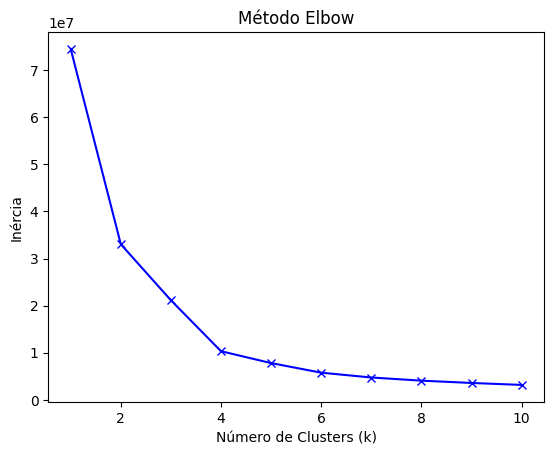

In [ ]:
# APLICAÇÂO DO MÉTODO ELBOW PARA DEFINIR NÚMERO DE CLUSTERS IDEAL
# Lista para armazenar a inércia
inertia = []

# Teste diferentes valores de k (número de clusters)
k_values = range(1, 11)

for k in k_values:
    # Instancia e ajuste do modelo K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_norm)

    # Adicção da inércia à lista
    inertia.append(kmeans.inertia_)

# Gráfico da inércia em relação ao número de clusters
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método Elbow')
plt.show()

In [ ]:
# Aplicação do Algoritmo K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_norm)

# OLabels dos clusters para cada ponto de dados
labels = kmeans.labels_

# Adicção das labels ao DataFrame original
df_norm['Cluster'] = labels

In [ ]:
df_norm

,Codigo_Infracao,Amparo_Legal_Codificado,Local_Infracao_Codificado,Cluster
0,9.137944,5.665441,1.461591,0
1,9.137944,5.665441,1.464420,0
2,4.461538,5.384191,1.461591,3
3,9.137944,5.665441,9.259608,2
4,9.137944,5.665441,9.259570,2
...,...,...,...,...
597441,9.137944,5.665441,1.461820,0
597442,9.137944,5.665441,1.462833,0
597443,9.137944,5.665441,1.462833,0
597444,9.137944,5.665441,1.460540,0


# Resultado da Clusterização

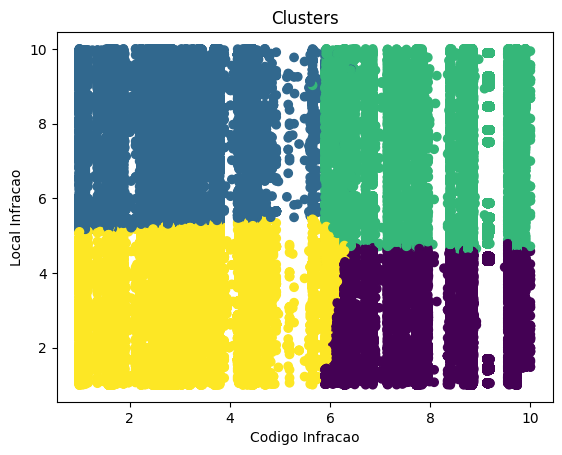

In [ ]:
# Gráfico de dispersão para visualizar os clusters em um espaço bidimensional
plt.scatter(df_norm['Codigo_Infracao'], df_norm['Local_Infracao_Codificado'], c=df_norm['Cluster'])
plt.xlabel('Codigo Infracao')
plt.ylabel('Local Infracao')
plt.title('Clusters')
plt.show()


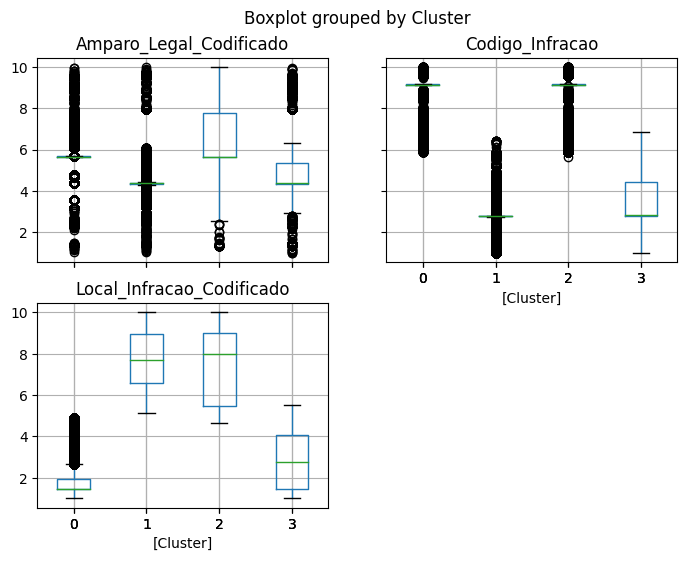

In [ ]:
# Box plot para comparar as distribuições das variáveis em cada cluster
df_norm.boxplot(by='Cluster', figsize=(8, 6))
plt.xlabel('Cluster')
plt.ylabel('Valores Normalizados')
plt.title('Distribuição por Cluster')
plt.show()


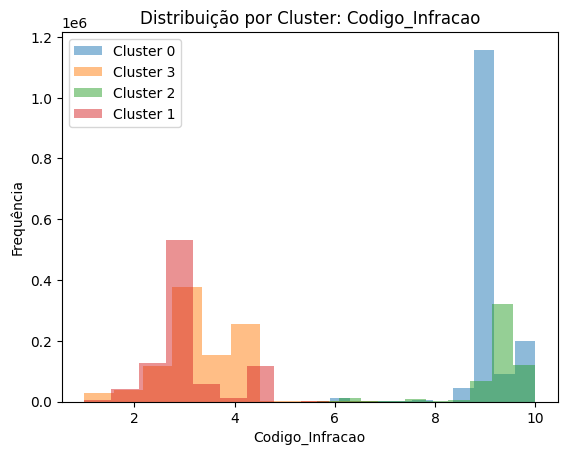

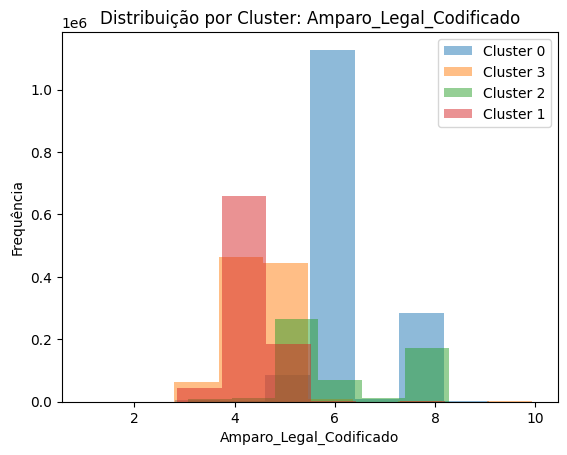

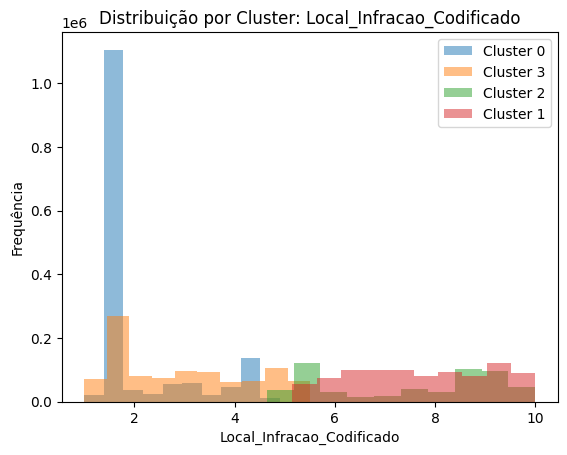

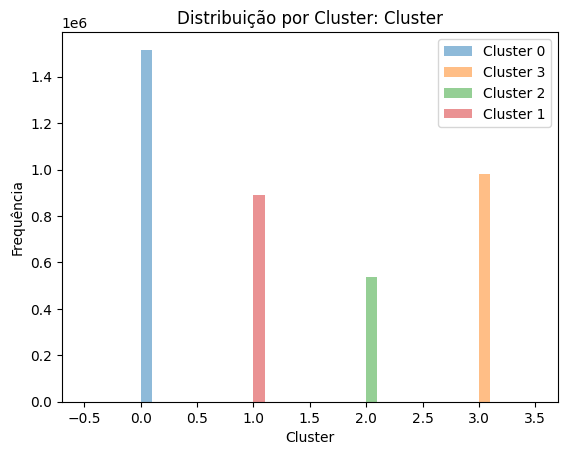

In [ ]:
# Histograma: Distribuição para cada variável, separando-os por cluster
for col in df_norm.columns:
    plt.figure()
    for cluster in df_norm['Cluster'].unique():
        plt.hist(df_norm[df_norm['Cluster'] == cluster][col], alpha=0.5, label='Cluster {}'.format(cluster))
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.title('Distribuição por Cluster: {}'.format(col))
    plt.legend()
    plt.show()


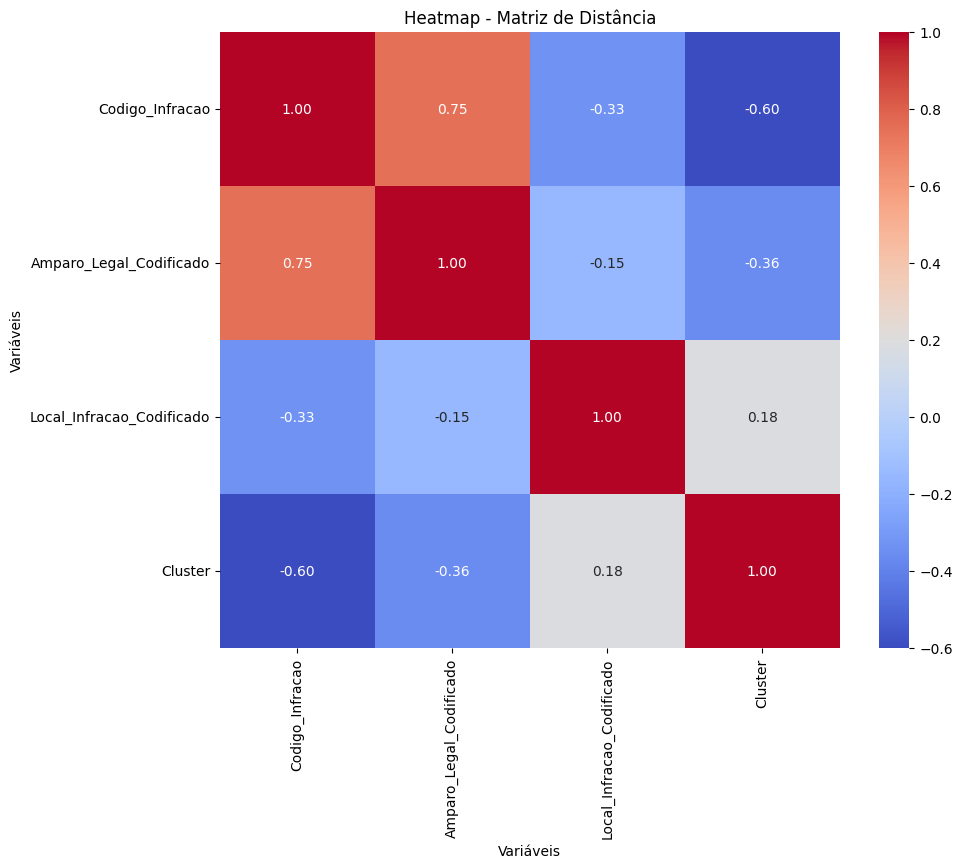

In [ ]:
#Heatmap: Intensidade de uma variável em relação a outras
# Matriz de distância entre os pontos de dados
dist_matrix = df_norm.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dist_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap - Matriz de Distância")
plt.xlabel("Variáveis")
plt.ylabel("Variáveis")
plt.show()


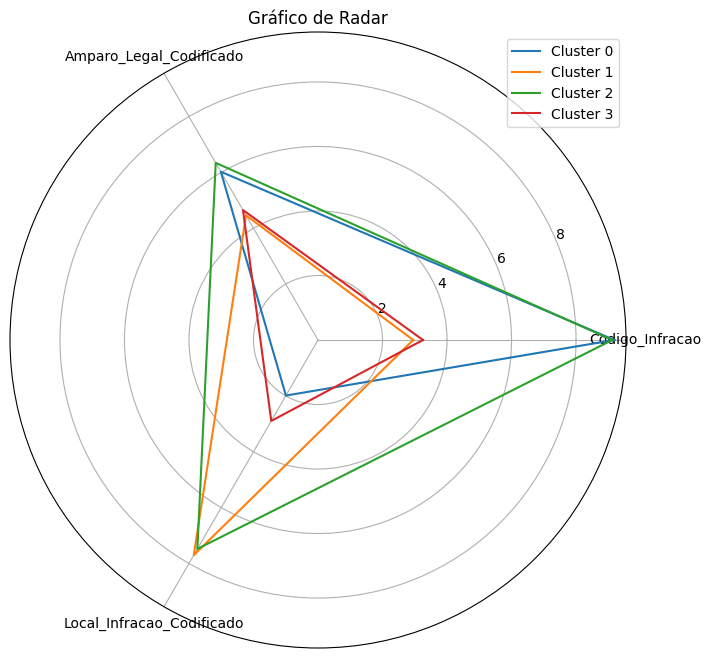

In [ ]:
# Gráfico de Radar: Comparação dos valores das variáveis em diferentes clusters
# Calculo das médias das variáveis em cada cluster
means = df_norm.groupby('Cluster').mean()

# Definição das variáveis e seus valores para cada cluster
variables = means.columns
values = means.values

# Verifiqcação do número de variáveis, se é igual ao número de valores para cada cluster
if len(variables) != values.shape[1]:
    raise ValueError("O número de variáveis não coincide com o número de valores para cada cluster.")

# Array com os ângulos do gráfico de radar
angles = np.linspace(0, 2*np.pi, len(variables), endpoint=False).tolist()
angles += angles[:1]

# Gráfico de radar
plt.figure(figsize=(10, 8))
for value in values:
    value = np.concatenate((value, [value[0]]))
    plt.polar(angles, value)
plt.xticks(angles[:-1], variables)
plt.title("Gráfico de Radar")
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
plt.show()


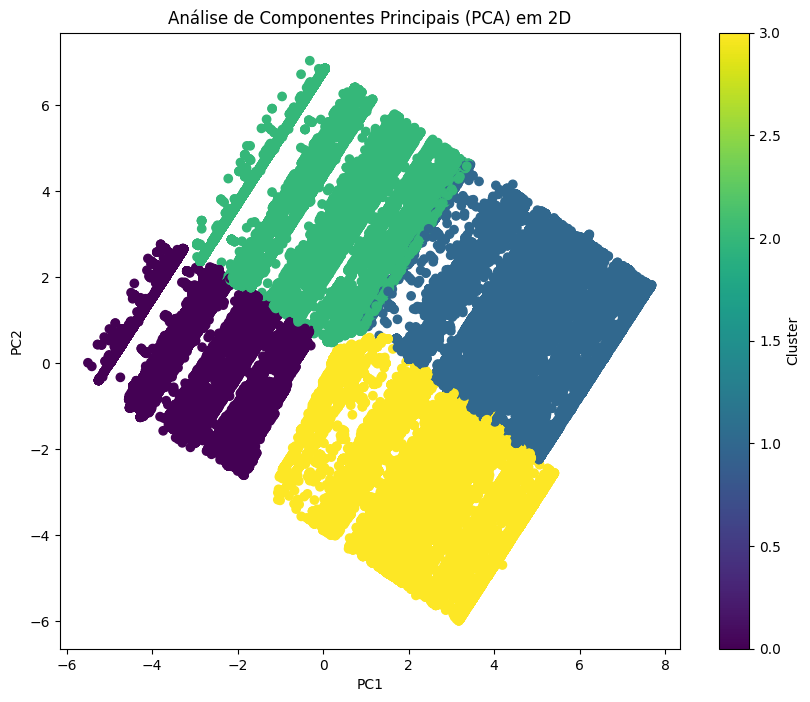

In [ ]:
# Análise de Componentes Principais (PCA): Representar os clusters em um espaço mais facilmente compreensível
# Aplicação do PCA em 2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_norm)

# DataFrame com os componentes principais
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot dos dados em 2D
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_norm['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Análise de Componentes Principais (PCA) em 2D')
plt.colorbar(label='Cluster')
plt.show()


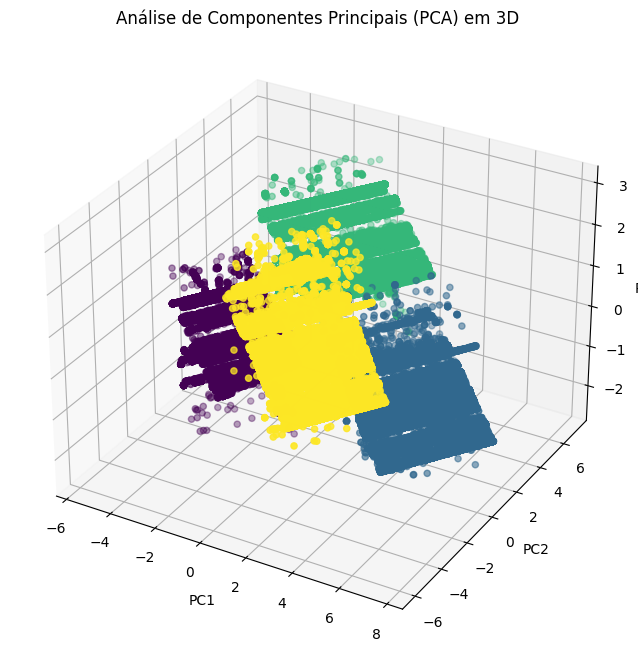

In [ ]:
# Análise de Componentes Principais (PCA): Representar os clusters em um espaço mais facilmente compreensível
# Aplicação do PCA em 3D
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_norm)

# DataFrame com os componentes principais
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Plot dos dados em 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_norm['Cluster'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Análise de Componentes Principais (PCA) em 3D')
plt.show()
